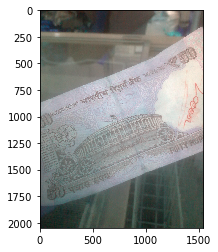

[[[ 22  41  44]
  [ 27  44  47]
  [ 32  47  49]
  ...
  [106  84  79]
  [105  83  78]
  [106  81  77]]

 [[ 25  42  45]
  [ 29  44  47]
  [ 33  46  48]
  ...
  [106  84  79]
  [105  83  78]
  [107  82  78]]

 [[ 29  43  49]
  [ 32  44  50]
  [ 34  46  48]
  ...
  [107  85  80]
  [106  84  79]
  [108  83  79]]

 ...

 [[  3  30  26]
  [  3  30  26]
  [  1  31  26]
  ...
  [ 25  74  58]
  [ 24  73  57]
  [ 25  72  56]]

 [[  3  28  24]
  [  3  28  24]
  [  0  29  24]
  ...
  [ 21  73  56]
  [ 22  71  55]
  [ 21  70  54]]

 [[  5  26  23]
  [  4  27  23]
  [  2  27  23]
  ...
  [ 18  70  53]
  [ 17  69  52]
  [ 19  68  52]]]


In [29]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR= "C:\dataset"
CATEGORIES= ["fifty","hundred","ten","thousand","twenty"]

for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break        
print(img_array)    

In [3]:
print(img_array.shape)

(2048, 1536)


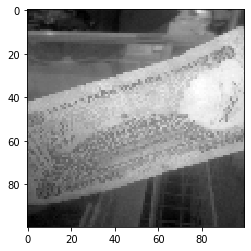

In [4]:
IMG_SIZE=100

new_array= cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array, cmap="gray")
plt.show()

In [17]:
training_data= []

def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array= cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e: 
                pass
            
create_training_data()    

In [18]:
print(len(training_data))

2169


In [22]:
import random

random.shuffle(training_data)

In [23]:
for sample in training_data[:10]:
    print(sample[1])

1
2
0
0
4
3
4
3
2
3


In [24]:
X = []
y = []

In [25]:
for features,label in training_data:
    X.append(features)
    y.append(label)

X= np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,3)

In [26]:
import pickle

pickle_out=open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out=open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [27]:
pickle_in=open("X.pickle","rb")
X=pickle.load(pickle_in)

In [28]:
X[1]

array([[[149, 157, 138],
        [123, 126, 111],
        [121, 130, 117],
        ...,
        [134, 117, 108],
        [114,  94,  87],
        [113,  93,  82]],

       [[160, 179, 157],
        [129, 126, 112],
        [116, 126, 114],
        ...,
        [101, 106,  96],
        [102,  92,  84],
        [107,  87,  82]],

       [[161, 187, 167],
        [128, 132, 117],
        [119, 133, 120],
        ...,
        [110,  92,  81],
        [110,  88,  78],
        [111,  84,  78]],

       ...,

       [[141, 122, 109],
        [137, 111,  99],
        [145, 115, 101],
        ...,
        [ 56,  52,  41],
        [ 38,  53,  36],
        [ 60,  51,  37]],

       [[150, 124, 112],
        [152, 123, 112],
        [150, 121, 114],
        ...,
        [ 51,  51,  45],
        [ 60,  49,  35],
        [ 70,  46,  39]],

       [[156, 130, 115],
        [157, 127, 113],
        [157, 123, 110],
        ...,
        [ 55,  53,  43],
        [ 63,  46,  33],
        [ 52,  51,  36]]